In [1]:
import pandas as pd
import numpy as np

from sklearn.metrics import auc, confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve, PrecisionRecallDisplay

In [2]:
colNames = []
for i in range(51):
    colNames.append(f'B{i}')

test = pd.read_csv('_annotations.txt', sep=' ', names=colNames, header=None)

In [3]:
test = test.fillna(0)

In [4]:
testData = []
colSizeTest = []
# tmp = np.arr
for i in range(85):
    colIter = 0
    for j in range(1,51):
        tmp = test.iloc[i][j]
        if tmp != 0:
            colIter += 1
            tmp2 = tmp.split(',')
            tmp4 = list(map(float, tmp2))
            testData.append(tmp4)
    colSizeTest.append(colIter)
    
fileNamesTest = test['B0']

In [5]:
testData

[[41.0, 78.0, 84.0, 166.0, 1.0],
 [187.0, 105.0, 261.0, 235.0, 1.0],
 [314.0, 89.0, 371.0, 196.0, 1.0],
 [111.0, 148.0, 257.0, 287.0, 1.0],
 [112.0, 211.0, 147.0, 275.0, 1.0],
 [174.0, 15.0, 206.0, 76.0, 1.0],
 [201.0, 87.0, 239.0, 157.0, 1.0],
 [224.0, 37.0, 255.0, 98.0, 1.0],
 [289.0, 126.0, 311.0, 166.0, 1.0],
 [350.0, 133.0, 371.0, 174.0, 1.0],
 [29.0, 85.0, 51.0, 111.0, 1.0],
 [99.0, 70.0, 117.0, 98.0, 1.0],
 [60.0, 111.0, 69.0, 128.0, 1.0],
 [134.0, 92.0, 146.0, 113.0, 1.0],
 [169.0, 81.0, 184.0, 115.0, 1.0],
 [212.0, 89.0, 229.0, 124.0, 1.0],
 [290.0, 91.0, 302.0, 126.0, 1.0],
 [351.0, 85.0, 366.0, 117.0, 1.0],
 [241.0, 135.0, 245.0, 144.0, 1.0],
 [409.0, 145.0, 413.0, 154.0, 1.0],
 [403.0, 146.0, 409.0, 157.0, 1.0],
 [42.0, 88.0, 58.0, 114.0, 1.0],
 [107.0, 69.0, 124.0, 97.0, 1.0],
 [195.0, 92.0, 209.0, 113.0, 1.0],
 [273.0, 130.0, 288.0, 158.0, 1.0],
 [362.0, 109.0, 376.0, 133.0, 0.0],
 [395.0, 127.0, 410.0, 155.0, 1.0],
 [130.0, 156.0, 264.0, 270.0, 2.0],
 [50.0, 134.0, 87.0,

In [6]:
colSizeTest
fibTest = []
fibTest.append(0)
totalTest = 0
for i in range(0,len(colSizeTest)):
    totalTest = totalTest + colSizeTest[i]
    fibTest.append(totalTest)

In [7]:
fileNamesTest

0     maksssksksss397_png.rf.067823344727b8476f947a9...
1     maksssksksss273_png.rf.0b54a8109d74ca705f3f9e0...
2     maksssksksss572_png.rf.07abf21a411bde33d104b44...
3     maksssksksss277_png.rf.0d59290653dde9467343eee...
4     maksssksksss728_png.rf.0d07189c65a97afd62fb232...
                            ...                        
80    maksssksksss620_png.rf.fe3ce0ee4e305a6aecb983f...
81    maksssksksss587_png.rf.ebcbd6cc90b9da18fce2d93...
82    maksssksksss663_png.rf.f2432361f8252606ebb6765...
83    maksssksksss329_png.rf.fa8006f8b9458d77d296ee5...
84    maksssksksss741_png.rf.ef6f86c800f887f96a2b6b9...
Name: B0, Length: 85, dtype: object

In [8]:
listGTBoxesDict = []

for i in range(len(fibTest)-1):
    GTBox = []
    for j in range(fibTest[i],fibTest[i+1]):
        GTBox.append(testData[j][0:4])
        
    GTBoxDict = {fileNamesTest[i]: GTBox}
    listGTBoxesDict.append(GTBoxDict)

In [9]:
# listPredBoxesDict = {}

for i in range(len(fibTest)-1):
    GTBox = []
    for j in range(fibTest[i],fibTest[i+1]):#########
        GTBox.append(testData[j][0:4])
        
    GTBoxDict = {fileNamesTest[i]: GTBox}
    if i == 0:
        dictGTBoxesDict = GTBoxDict
    else:
        dictGTBoxesDict.update(GTBoxDict)

In [10]:
listGTBoxesDict

[{'maksssksksss397_png.rf.067823344727b8476f947a915f37114d.jpg': [[41.0,
    78.0,
    84.0,
    166.0],
   [187.0, 105.0, 261.0, 235.0],
   [314.0, 89.0, 371.0, 196.0]]},
 {'maksssksksss273_png.rf.0b54a8109d74ca705f3f9e0a45622933.jpg': [[111.0,
    148.0,
    257.0,
    287.0]]},
 {'maksssksksss572_png.rf.07abf21a411bde33d104b44fcf13fe83.jpg': [[112.0,
    211.0,
    147.0,
    275.0],
   [174.0, 15.0, 206.0, 76.0],
   [201.0, 87.0, 239.0, 157.0],
   [224.0, 37.0, 255.0, 98.0],
   [289.0, 126.0, 311.0, 166.0],
   [350.0, 133.0, 371.0, 174.0]]},
 {'maksssksksss277_png.rf.0d59290653dde9467343eee6b88dee95.jpg': [[29.0,
    85.0,
    51.0,
    111.0],
   [99.0, 70.0, 117.0, 98.0],
   [60.0, 111.0, 69.0, 128.0],
   [134.0, 92.0, 146.0, 113.0],
   [169.0, 81.0, 184.0, 115.0],
   [212.0, 89.0, 229.0, 124.0],
   [290.0, 91.0, 302.0, 126.0],
   [351.0, 85.0, 366.0, 117.0],
   [241.0, 135.0, 245.0, 144.0],
   [409.0, 145.0, 413.0, 154.0],
   [403.0, 146.0, 409.0, 157.0]]},
 {'maksssksksss728_pn

In [11]:
dictGTBoxesDict

{'maksssksksss397_png.rf.067823344727b8476f947a915f37114d.jpg': [[41.0,
   78.0,
   84.0,
   166.0],
  [187.0, 105.0, 261.0, 235.0],
  [314.0, 89.0, 371.0, 196.0]],
 'maksssksksss273_png.rf.0b54a8109d74ca705f3f9e0a45622933.jpg': [[111.0,
   148.0,
   257.0,
   287.0]],
 'maksssksksss572_png.rf.07abf21a411bde33d104b44fcf13fe83.jpg': [[112.0,
   211.0,
   147.0,
   275.0],
  [174.0, 15.0, 206.0, 76.0],
  [201.0, 87.0, 239.0, 157.0],
  [224.0, 37.0, 255.0, 98.0],
  [289.0, 126.0, 311.0, 166.0],
  [350.0, 133.0, 371.0, 174.0]],
 'maksssksksss277_png.rf.0d59290653dde9467343eee6b88dee95.jpg': [[29.0,
   85.0,
   51.0,
   111.0],
  [99.0, 70.0, 117.0, 98.0],
  [60.0, 111.0, 69.0, 128.0],
  [134.0, 92.0, 146.0, 113.0],
  [169.0, 81.0, 184.0, 115.0],
  [212.0, 89.0, 229.0, 124.0],
  [290.0, 91.0, 302.0, 126.0],
  [351.0, 85.0, 366.0, 117.0],
  [241.0, 135.0, 245.0, 144.0],
  [409.0, 145.0, 413.0, 154.0],
  [403.0, 146.0, 409.0, 157.0]],
 'maksssksksss728_png.rf.0d07189c65a97afd62fb232f26cc44a2.

## Predction DATA

In [12]:
colNamesYolo = []
for i in range(26):
    colNamesYolo.append(f'B{i}')

testYolo = pd.read_csv('Yolov4_Deep_learncheckpointsYolov4_epoch50.pth.txt', sep='[', names=colNamesYolo, header=None)

In [13]:
testYolo = testYolo.fillna(0)

In [14]:
testYolo

,B0,B1,B2,B3,B4,B5,B6,B7,B8,B9,...,B16,B17,B18,B19,B20,B21,B22,B23,B24,B25
0,test/maksssksksss74_png.rf.2fff938239d9d132474...,"2.0, 223.0, 33.0, 266.0, 0.99965715, 1.0, 1]","94.0, 187.0, 141.0, 258.0, 0.99931026, 0.99999...","333.0, 173.0, 353.0, 198.0, 0.9975563, 0.99999...","27.0, 166.0, 43.0, 189.0, 0.9965984, 1.0, 1]","213.0, 168.0, 236.0, 202.0, 0.9957848, 1.0, 1]","176.0, 178.0, 191.0, 199.0, 0.985283, 0.999965...","91.0, 143.0, 102.0, 160.0, 0.9790355, 0.999999...","46.0, 155.0, 56.0, 172.0, 0.9575161, 0.9999929...","301.0, 149.0, 305.0, 154.0, 0.9336424, 1.0, 1]",...,"306.0, 179.0, 316.0, 190.0, 0.8314373, 0.99978...","318.0, 161.0, 326.0, 174.0, 0.7733693, 0.99999...","117.0, 142.0, 122.0, 150.0, 0.7626988, 0.99999...","75.0, 171.0, 88.0, 188.0, 0.75582707, 0.999994...","201.0, 158.0, 206.0, 169.0, 0.7510333, 0.99999...","287.0, 158.0, 297.0, 172.0, 0.70546985, 0.9999...","407.0, 178.0, 416.0, 209.0, 0.6978336, 0.99939...","405.0, 148.0, 412.0, 160.0, 0.5732855, 0.99998...","396.0, 157.0, 404.0, 166.0, 0.5028503, 0.99999...",0
1,test/maksssksksss845_png.rf.d3bb56b345ecc5c23b...,"143.0, 206.0, 241.0, 313.0, 0.99073714, 0.9999...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,test/maksssksksss837_png.rf.162eec716963758443...,"123.0, 142.0, 262.0, 274.0, 0.9986927, 1.0, 2]",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,test/maksssksksss273_png.rf.0b54a8109d74ca705f...,"113.0, 154.0, 265.0, 289.0, 0.9984937, 0.99999...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,test/maksssksksss560_png.rf.d7384b1b3cdca3bb1d...,"186.0, 194.0, 226.0, 254.0, 0.99917704, 0.9999...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,test/maksssksksss420_png.rf.c6c16fe8317e9d8f15...,"133.0, 166.0, 270.0, 291.0, 0.9983535, 1.0, 2]",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
81,test/maksssksksss342_png.rf.e7b25c67ebad03c5f8...,"28.0, 83.0, 53.0, 132.0, 0.9999274, 1.0, 2]","190.0, 102.0, 211.0, 143.0, 0.9997813, 1.0, 1]","259.0, 154.0, 299.0, 209.0, 0.9997466, 0.99999...","73.0, 148.0, 104.0, 193.0, 0.9995615, 1.0, 1]","307.0, 98.0, 333.0, 134.0, 0.9991579, 1.0, 1]","134.0, 66.0, 152.0, 92.0, 0.99863845, 1.0, 1]","110.0, 184.0, 148.0, 251.0, 0.99792224, 0.9999...","166.0, 87.0, 179.0, 113.0, 0.9945353, 0.999999...","107.0, 76.0, 121.0, 101.0, 0.9939796, 0.999998...",...,0,0,0,0,0,0,0,0,0,0
82,test/maksssksksss64_png.rf.2a68904be1aa2e66672...,"318.0, 38.0, 337.0, 75.0, 0.9998036, 1.0, 1]","155.0, 71.0, 176.0, 108.0, 0.9996013, 1.0, 1]","101.0, 79.0, 120.0, 115.0, 0.98466694, 1.0, 1]",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
83,test/maksssksksss773_png.rf.975b5fd764c61ffecd...,"152.0, 94.0, 180.0, 133.0, 0.9952651, 0.999999...","304.0, 94.0, 323.0, 122.0, 0.9665855, 0.999994...","67.0, 106.0, 94.0, 127.0, 0.94435734, 0.999532...","236.0, 19.0, 243.0, 30.0, 0.68055433, 0.990655...","398.0, 25.0, 409.0, 44.0, 0.5675252, 0.9999693...",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
predictData = []
colSize = []
# tmp = np.arr
for i in range(85):
    colIter = 0
    for j in range(1,26):
        tmp = testYolo.iloc[i][j]
        if tmp != 0:
            colIter += 1
            tmp2 = tmp.replace("]", "")
            tmp3 = tmp2.replace(" ", "").replace("'", "").split(',')
            tmp4 = list(map(float, tmp3))
            predictData.append(tmp4)
    colSize.append(colIter)
    
tmp = testYolo['B0']
fileNamesPredict = []
for name in range(len(tmp)):
    fileNamesPredict.append(tmp[name].replace(',','').replace('test/', ''))

In [16]:
predictData

[[2.0, 223.0, 33.0, 266.0, 0.99965715, 1.0, 1.0],
 [94.0, 187.0, 141.0, 258.0, 0.99931026, 0.99999917, 1.0],
 [333.0, 173.0, 353.0, 198.0, 0.9975563, 0.99999976, 1.0],
 [27.0, 166.0, 43.0, 189.0, 0.9965984, 1.0, 1.0],
 [213.0, 168.0, 236.0, 202.0, 0.9957848, 1.0, 1.0],
 [176.0, 178.0, 191.0, 199.0, 0.985283, 0.9999659, 1.0],
 [91.0, 143.0, 102.0, 160.0, 0.9790355, 0.99999964, 1.0],
 [46.0, 155.0, 56.0, 172.0, 0.9575161, 0.99999297, 1.0],
 [301.0, 149.0, 305.0, 154.0, 0.9336424, 1.0, 1.0],
 [236.0, 140.0, 249.0, 157.0, 0.9077409, 0.99999714, 1.0],
 [162.0, 155.0, 172.0, 169.0, 0.90702754, 0.99997306, 1.0],
 [288.0, 140.0, 294.0, 147.0, 0.86718166, 0.9999999, 1.0],
 [182.0, 156.0, 188.0, 165.0, 0.861434, 0.99999654, 1.0],
 [65.0, 137.0, 75.0, 154.0, 0.8500638, 0.9999924, 1.0],
 [366.0, 160.0, 375.0, 174.0, 0.8358008, 0.9999924, 1.0],
 [306.0, 179.0, 316.0, 190.0, 0.8314373, 0.99978083, 1.0],
 [318.0, 161.0, 326.0, 174.0, 0.7733693, 0.9999956, 1.0],
 [117.0, 142.0, 122.0, 150.0, 0.7626988

In [17]:
(colSize)
fib = []
fib.append(0)
total = 0
for i in range(0,len(colSize)):
    total = total + colSize[i]
    fib.append(total)
colSize

[24,
 1,
 1,
 1,
 1,
 1,
 1,
 6,
 2,
 1,
 4,
 25,
 4,
 14,
 3,
 1,
 3,
 2,
 2,
 1,
 13,
 1,
 1,
 8,
 6,
 4,
 1,
 8,
 1,
 1,
 5,
 7,
 1,
 1,
 1,
 6,
 12,
 7,
 1,
 1,
 1,
 5,
 1,
 1,
 5,
 2,
 4,
 1,
 5,
 2,
 5,
 2,
 2,
 2,
 12,
 8,
 1,
 3,
 4,
 1,
 1,
 1,
 3,
 3,
 1,
 4,
 4,
 2,
 3,
 2,
 13,
 13,
 1,
 5,
 1,
 6,
 1,
 9,
 1,
 8,
 1,
 13,
 3,
 5,
 8]

In [18]:
pred1 = []
for ll in range(colSize[0]):
    pred1.append(predictData[ll][0:4])
    
score1 = []
for ll in range(colSize[0]):
    score1.append(predictData[ll][4])

score1

[0.99965715,
 0.99931026,
 0.9975563,
 0.9965984,
 0.9957848,
 0.985283,
 0.9790355,
 0.9575161,
 0.9336424,
 0.9077409,
 0.90702754,
 0.86718166,
 0.861434,
 0.8500638,
 0.8358008,
 0.8314373,
 0.7733693,
 0.7626988,
 0.75582707,
 0.7510333,
 0.70546985,
 0.6978336,
 0.5732855,
 0.5028503]

#### Converting to IoC format: dictionaries

In [19]:
predictData

[[2.0, 223.0, 33.0, 266.0, 0.99965715, 1.0, 1.0],
 [94.0, 187.0, 141.0, 258.0, 0.99931026, 0.99999917, 1.0],
 [333.0, 173.0, 353.0, 198.0, 0.9975563, 0.99999976, 1.0],
 [27.0, 166.0, 43.0, 189.0, 0.9965984, 1.0, 1.0],
 [213.0, 168.0, 236.0, 202.0, 0.9957848, 1.0, 1.0],
 [176.0, 178.0, 191.0, 199.0, 0.985283, 0.9999659, 1.0],
 [91.0, 143.0, 102.0, 160.0, 0.9790355, 0.99999964, 1.0],
 [46.0, 155.0, 56.0, 172.0, 0.9575161, 0.99999297, 1.0],
 [301.0, 149.0, 305.0, 154.0, 0.9336424, 1.0, 1.0],
 [236.0, 140.0, 249.0, 157.0, 0.9077409, 0.99999714, 1.0],
 [162.0, 155.0, 172.0, 169.0, 0.90702754, 0.99997306, 1.0],
 [288.0, 140.0, 294.0, 147.0, 0.86718166, 0.9999999, 1.0],
 [182.0, 156.0, 188.0, 165.0, 0.861434, 0.99999654, 1.0],
 [65.0, 137.0, 75.0, 154.0, 0.8500638, 0.9999924, 1.0],
 [366.0, 160.0, 375.0, 174.0, 0.8358008, 0.9999924, 1.0],
 [306.0, 179.0, 316.0, 190.0, 0.8314373, 0.99978083, 1.0],
 [318.0, 161.0, 326.0, 174.0, 0.7733693, 0.9999956, 1.0],
 [117.0, 142.0, 122.0, 150.0, 0.7626988

In [20]:
listPredBoxesDict = []

for i in range(len(fib)-1):
    predBox = []
    predScore = []
    for j in range(fib[i],fib[i+1]):
        predBox.append(predictData[j][0:4])
        predScore.append(predictData[j][4])
        
    yoloBoxDict = {fileNamesPredict[i]: {"boxes": predBox, "scores": predScore}}
    listPredBoxesDict.append(yoloBoxDict)

In [21]:
range(len(colSize))

range(0, 85)

In [22]:
# listPredBoxesDict = {}

for i in range(len(fib)-1):
    predBox = []
    predScore = []
    for j in range(fib[i],fib[i+1]):###############
        predBox.append(predictData[j][0:4])
        predScore.append(predictData[j][4])
        
    yoloBoxDict = {fileNamesPredict[i]: {"boxes": predBox, "scores": predScore}}
    if i == 0:
        dictPredBoxesDict = yoloBoxDict
    else:
        dictPredBoxesDict.update(yoloBoxDict)

In [23]:
i=0
range(colSize[i],colSize[i+1])

range(24, 1)

In [24]:
listPredBoxesDict

[{'maksssksksss74_png.rf.2fff938239d9d132474e9b4a01f6c8f4.jpg': {'boxes': [[2.0,
     223.0,
     33.0,
     266.0],
    [94.0, 187.0, 141.0, 258.0],
    [333.0, 173.0, 353.0, 198.0],
    [27.0, 166.0, 43.0, 189.0],
    [213.0, 168.0, 236.0, 202.0],
    [176.0, 178.0, 191.0, 199.0],
    [91.0, 143.0, 102.0, 160.0],
    [46.0, 155.0, 56.0, 172.0],
    [301.0, 149.0, 305.0, 154.0],
    [236.0, 140.0, 249.0, 157.0],
    [162.0, 155.0, 172.0, 169.0],
    [288.0, 140.0, 294.0, 147.0],
    [182.0, 156.0, 188.0, 165.0],
    [65.0, 137.0, 75.0, 154.0],
    [366.0, 160.0, 375.0, 174.0],
    [306.0, 179.0, 316.0, 190.0],
    [318.0, 161.0, 326.0, 174.0],
    [117.0, 142.0, 122.0, 150.0],
    [75.0, 171.0, 88.0, 188.0],
    [201.0, 158.0, 206.0, 169.0],
    [287.0, 158.0, 297.0, 172.0],
    [407.0, 178.0, 416.0, 209.0],
    [405.0, 148.0, 412.0, 160.0],
    [396.0, 157.0, 404.0, 166.0]],
   'scores': [0.99965715,
    0.99931026,
    0.9975563,
    0.9965984,
    0.9957848,
    0.985283,
    0.979

In [25]:
dictPredBoxesDict

{'maksssksksss74_png.rf.2fff938239d9d132474e9b4a01f6c8f4.jpg': {'boxes': [[2.0,
    223.0,
    33.0,
    266.0],
   [94.0, 187.0, 141.0, 258.0],
   [333.0, 173.0, 353.0, 198.0],
   [27.0, 166.0, 43.0, 189.0],
   [213.0, 168.0, 236.0, 202.0],
   [176.0, 178.0, 191.0, 199.0],
   [91.0, 143.0, 102.0, 160.0],
   [46.0, 155.0, 56.0, 172.0],
   [301.0, 149.0, 305.0, 154.0],
   [236.0, 140.0, 249.0, 157.0],
   [162.0, 155.0, 172.0, 169.0],
   [288.0, 140.0, 294.0, 147.0],
   [182.0, 156.0, 188.0, 165.0],
   [65.0, 137.0, 75.0, 154.0],
   [366.0, 160.0, 375.0, 174.0],
   [306.0, 179.0, 316.0, 190.0],
   [318.0, 161.0, 326.0, 174.0],
   [117.0, 142.0, 122.0, 150.0],
   [75.0, 171.0, 88.0, 188.0],
   [201.0, 158.0, 206.0, 169.0],
   [287.0, 158.0, 297.0, 172.0],
   [407.0, 178.0, 416.0, 209.0],
   [405.0, 148.0, 412.0, 160.0],
   [396.0, 157.0, 404.0, 166.0]],
  'scores': [0.99965715,
   0.99931026,
   0.9975563,
   0.9965984,
   0.9957848,
   0.985283,
   0.9790355,
   0.9575161,
   0.9336424,


In [26]:
import numpy as np
from copy import deepcopy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [27]:
def get_model_scores(pred_boxes):
    """Creates a dictionary of from model_scores to image ids.
    Args:
        pred_boxes (dict): dict of dicts of 'boxes' and 'scores'
    Returns:
        dict: keys are model_scores and values are image ids (usually filenames)
    """
    model_score={}
    for img_id, val in pred_boxes.items():
        for score in val['scores']:
            if score not in model_score.keys():
                model_score[score]=[img_id]
            else:
                model_score[score].append(img_id)
    return model_score

## Calculating Scores

In [28]:
def calc_iou(gt_bbox, pred_bbox):
    '''
    This function takes the predicted bounding box and ground truth bounding box and 
    return the IoU ratio
    '''
    x_topleft_gt, y_topleft_gt, x_bottomright_gt, y_bottomright_gt= gt_bbox
    x_topleft_p, y_topleft_p, x_bottomright_p, y_bottomright_p= pred_bbox
    
    if (x_topleft_gt > x_bottomright_gt) or (y_topleft_gt> y_bottomright_gt):
        raise AssertionError("Ground Truth Bounding Box is not correct")
    if (x_topleft_p > x_bottomright_p) or (y_topleft_p> y_bottomright_p):
        raise AssertionError("Predicted Bounding Box is not correct",x_topleft_p, x_bottomright_p,y_topleft_p,y_bottomright_gt)
        
         
    #if the GT bbox and predcited BBox do not overlap then iou=0
    if(x_bottomright_gt< x_topleft_p):
        # If bottom right of x-coordinate  GT  bbox is less than or above the top left of x coordinate of  the predicted BBox
        
        return 0.0
    if(y_bottomright_gt< y_topleft_p):  # If bottom right of y-coordinate  GT  bbox is less than or above the top left of y coordinate of  the predicted BBox
        
        return 0.0
    if(x_topleft_gt> x_bottomright_p): # If bottom right of x-coordinate  GT  bbox is greater than or below the bottom right  of x coordinate of  the predcited BBox
        
        return 0.0
    if(y_topleft_gt> y_bottomright_p): # If bottom right of y-coordinate  GT  bbox is greater than or below the bottom right  of y coordinate of  the predcited BBox
        
        return 0.0
    
    
    GT_bbox_area = (x_bottomright_gt -  x_topleft_gt + 1) * (  y_bottomright_gt -y_topleft_gt + 1)
    Pred_bbox_area =(x_bottomright_p - x_topleft_p + 1 ) * ( y_bottomright_p -y_topleft_p + 1)
    
    x_top_left =np.max([x_topleft_gt, x_topleft_p])
    y_top_left = np.max([y_topleft_gt, y_topleft_p])
    x_bottom_right = np.min([x_bottomright_gt, x_bottomright_p])
    y_bottom_right = np.min([y_bottomright_gt, y_bottomright_p])
    
    intersection_area = (x_bottom_right- x_top_left + 1) * (y_bottom_right-y_top_left  + 1)
    
    union_area = (GT_bbox_area + Pred_bbox_area - intersection_area)
   
    return intersection_area/union_area

In [29]:
maxScores = []
meanScores = []
for imageName in fileNamesTest:
    gtBoxes = np.array(dictGTBoxesDict[imageName])
    predBoxes = np.array(dictPredBoxesDict[imageName]['boxes'])
    ioc_score = []
    for gt_bbox in gtBoxes:
        iocScoreBox = []
        for pred_bbox in predBoxes:
            iocScoreBox.append(calc_iou(gt_bbox, pred_bbox))
            
        ioc_score.append(max(iocScoreBox))
        
    maxScores.append(ioc_score)
    meanScores.append(np.mean(ioc_score))

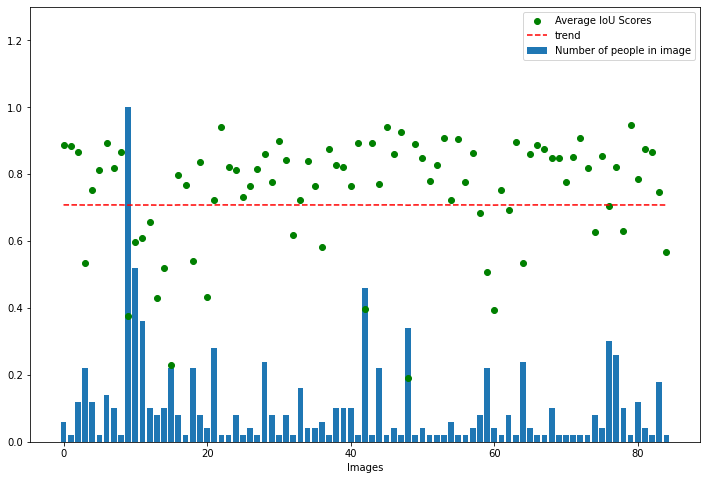

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt

trend = np.polyfit(range(len(meanScores)), meanScores, 1)
trend1 = np.poly1d(trend)
plt.figure(figsize=(12,8))
plt.bar(range(len(meanScores)),colSizeTest/np.max(colSizeTest), label='Number of people in image')
plt.scatter(range(len(meanScores)), meanScores, color='green', label='Average IoU Scores')

plt.plot(trend1((meanScores)), '--r', label='trend')

plt.xlabel('Images')
plt.ylim([0,1.3])
plt.legend(loc='best')

### Precision-Recall Curve

In [31]:
def calc_precision_recall(image_results):
    """Calculates precision and recall from the set of images
    Args:
        img_results (dict): dictionary formatted like:
            {
                'img_id1': {'true_pos': int, 'false_pos': int, 'false_neg': int},
                'img_id2': ...
                ...
            }
    Returns:
        tuple: of floats of (precision, recall)
    """
    true_positive=0
    false_positive=0
    false_negative=0
    for img_id, res in image_results.items():
        true_positive +=res['true_positive']
        false_positive += res['false_positive']
        false_negative += res['false_negative']
        try:
            precision = true_positive/(true_positive+ false_positive)
        except ZeroDivisionError:
            precision=0.0
        try:
            recall = true_positive/(true_positive + false_negative)
        except ZeroDivisionError:
            recall=0.0
    return (precision, recall)

In [32]:
def get_single_image_results(gt_boxes, pred_boxes, iou_thr):
    """Calculates number of true_pos, false_pos, false_neg from single batch of boxes.
    Args:
        gt_boxes (list of list of floats): list of locations of ground truth
            objects as [xmin, ymin, xmax, ymax]
        pred_boxes (dict): dict of dicts of 'boxes' (formatted like `gt_boxes`)
            and 'scores'
        iou_thr (float): value of IoU to consider as threshold for a
            true prediction.
    Returns:
        dict: true positives (int), false positives (int), false negatives (int)
    """
    all_pred_indices= range(len(pred_boxes))
    all_gt_indices=range(len(gt_boxes))
    if len(all_pred_indices)==0:
        tp=0
        fp=0
        fn=0
        return {'true_positive':tp, 'false_positive':fp, 'false_negative':fn}
    if len(all_gt_indices)==0:
        tp=0
        fp=0
        fn=0
        return {'true_positive':tp, 'false_positive':fp, 'false_negative':fn}
    
    gt_idx_thr=[]
    pred_idx_thr=[]
    ious=[]
    for ipb, pred_box in enumerate(pred_boxes['boxes']):
        for igb, gt_box in enumerate(gt_boxes):
            iou= calc_iou(gt_box, pred_box)
            
            if iou >iou_thr:
                gt_idx_thr.append(igb)
                pred_idx_thr.append(ipb)
                ious.append(iou)
    iou_sort = np.argsort(ious)[::1]
    if len(iou_sort)==0:
        tp=0
        fp=0
        fn=0
        return {'true_positive':tp, 'false_positive':fp, 'false_negative':fn}
    else:
        gt_match_idx=[]
        pred_match_idx=[]
        for idx in iou_sort:
            gt_idx=gt_idx_thr[idx]
            pr_idx= pred_idx_thr[idx]
            # If the boxes are unmatched, add them to matches
            if(gt_idx not in gt_match_idx) and (pr_idx not in pred_match_idx):
                gt_match_idx.append(gt_idx)
                pred_match_idx.append(pr_idx)
        tp= len(gt_match_idx)
        fp= len(pred_boxes) - len(pred_match_idx)
        fn = len(gt_boxes) - len(gt_match_idx)
    return {'true_positive': tp, 'false_positive': fp, 'false_negative': fn}

In [34]:
imageResultsDict = {}
IoU_thr = 0.7
for imageName in fileNamesTest:
    imageResultsDict[imageName] = get_single_image_results(dictGTBoxesDict[imageName], dictPredBoxesDict[imageName], IoU_thr)    

In [35]:
precision, recall = calc_precision_recall(imageResultsDict)
print(precision, recall)

1.716867469879518 0.6551724137931034
